## Example to perform common edge analysis with MultiGroup Model
This notebook explains how to calculate bootstrap probabilities for multiple datasets by multi group lingam algorithms.  
The algorithms covered here are MultiGroupDirectLiNGAM, MultiGroupRCD, and MultiGroupCAMUV.

## Import necessary packages

In [1]:
import lingam
import numpy as np
import pandas as pd
from lingam.utils import make_dot
from lingam.utils import get_common_edge_probabilities, print_common_edge_directions, make_dot_for_nan_probability_matrix

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

print([np.__version__, pd.__version__, lingam.__version__])

['1.26.4', '2.2.3', '1.10.0']


## Test data
We create test data consisting of 6 variables.

In [2]:
np.random.seed(0)
x3 = np.random.uniform(size=1000)
x0 = 3.0*x3 + np.random.uniform(size=1000)
x2 = 6.0*x3 + np.random.uniform(size=1000)
x1 = 3.0*x0 + 2.0*x2 + np.random.uniform(size=1000)
x5 = 4.0*x0 + np.random.uniform(size=1000)
x4 = 8.0*x0 - 1.0*x2 + np.random.uniform(size=1000)
X1 = pd.DataFrame(np.array([x0, x1, x2, x3, x4, x5]).T ,columns=['x0', 'x1', 'x2', 'x3', 'x4', 'x5'])
X1.head()

,x0,x1,x2,x3,x4,x5
0,2.239321,15.340724,4.104399,0.548814,14.176947,9.249925
1,2.155632,16.630954,4.767220,0.715189,12.775458,9.189045
2,2.284116,15.910406,4.139736,0.602763,14.201794,9.273880
3,2.343420,14.921457,3.519820,0.544883,15.580067,9.723392
4,1.314940,11.055176,3.146972,0.423655,7.604743,5.312976


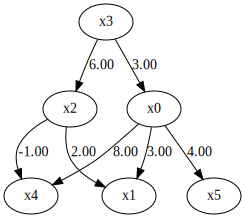

In [3]:
m = np.array([[0.0, 0.0, 0.0, 3.0, 0.0, 0.0],
              [3.0, 0.0, 2.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 6.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [8.0, 0.0,-1.0, 0.0, 0.0, 0.0],
              [4.0, 0.0, 0.0, 0.0, 0.0, 0.0]])

make_dot(m)

In [4]:
np.random.seed(0)
x0 = np.random.uniform(size=1000)
x3 = 3.5*x0 + np.random.uniform(size=1000)
x2 = 6.5*x3 + np.random.uniform(size=1000)
x1 = 3.5*x0 + 2.5*x2 + np.random.uniform(size=1000)
x5 = 4.5*x0 + np.random.uniform(size=1000)
x4 = - 1.5*x2 + np.random.uniform(size=1000)
X2 = pd.DataFrame(np.array([x0, x1, x2, x3, x4, x5]).T ,columns=['x0', 'x1', 'x2', 'x3', 'x4', 'x5'])
X2.head()

,x0,x1,x2,x3,x4,x5
0,0.548814,45.211678,17.150747,2.513728,-25.359341,2.762303
1,0.715189,45.162921,16.812056,2.513226,-24.920460,3.784870
2,0.602763,46.210489,17.328893,2.585498,-25.924740,2.849850
3,0.544883,45.892700,17.253621,2.615862,-25.527903,2.801687
4,0.423655,28.621780,10.529030,1.526767,-15.561349,1.959663


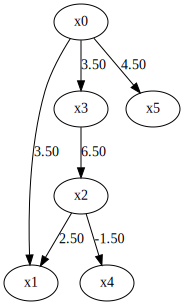

In [5]:
m = np.array([[0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [3.5, 0.0, 2.5, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 6.5, 0.0, 0.0],
              [3.5, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0,-1.5, 0.0, 0.0, 0.0],
              [4.5, 0.0, 0.0, 0.0, 0.0, 0.0]])

make_dot(m)

In [6]:
labels = X1.columns.tolist()

## Causal discovery in multi group models.
To calculate common edges, bootstrap with MultiGroupDirectLiNGAM. The results are stored in a list and retrieved.

In [7]:
np.random.seed(0)
X_list = [X1, X2]
model = lingam.MultiGroupDirectLiNGAM()
results = model.bootstrap(X_list, 100)

To display the list of edges, calculate the probability matrix of common edges.

In [8]:
cep = get_common_edge_probabilities(results)
print_common_edge_directions(cep, labels=labels)

x5 <--- x0 (100.0%)
x4 <--- x2 (100.0%)
x3 <--- x2 (88.4%)
x2 <--- x0 (79.2%)
x0 <--- x1 (79.2%)
x2 <--- x1 (79.2%)
x3 <--- x0 (45.4%)
x3 <--- x5 (4.2%)
x1 <--- x0 (1.2%)
x1 <--- x2 (1.2%)
x0 <--- x3 (1.0%)


The causal graph of common edges is as follows. The values of the edges are the occurrence probabilities.

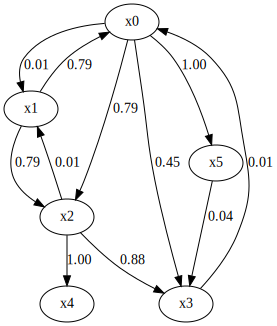

In [9]:
make_dot(cep[0])

Next, we will explain using MultiGroupRCD.

In [10]:
np.random.seed(0)
X_list = [X1, X2]
model = lingam.MultiGroupRCD()
results = model.bootstrap(X_list, 10)

In [11]:
cep = get_common_edge_probabilities(results)
print_common_edge_directions(cep, labels=labels)

x5 <--- x0 (81.0%)
x3 <--> x0 (81.0%)
x1 <--- x0 (49.0%)
x1 <--- x3 (49.0%)
x2 <--> x0 (49.0%)
x2 <--> x1 (49.0%)
x3 <--> x2 (36.0%)
x4 <--- x2 (25.0%)
x4 <--> x0 (25.0%)
x4 <--> x1 (25.0%)
x4 <--> x2 (16.0%)
x4 <--- x1 (9.0%)
x4 <--- x5 (9.0%)
x3 <--> x1 (9.0%)
x4 <--> x3 (9.0%)
x2 <--- x0 (4.0%)
x4 <--- x0 (4.0%)
x2 <--- x1 (4.0%)
x2 <--- x3 (4.0%)
x1 <--> x0 (4.0%)
x5 <--> x1 (4.0%)
x0 <--- x1 (1.0%)
x4 <--- x3 (1.0%)
x0 <--- x4 (1.0%)
x1 <--- x4 (1.0%)
x5 <--- x4 (1.0%)
x5 <--> x0 (1.0%)
x5 <--> x2 (1.0%)
x5 <--> x3 (1.0%)


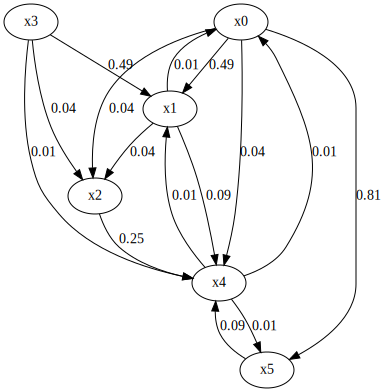

In [12]:
make_dot(cep[0])

To display a graph the probability of occurrence of bidirectional edges indicating hidden common causes is as follows.

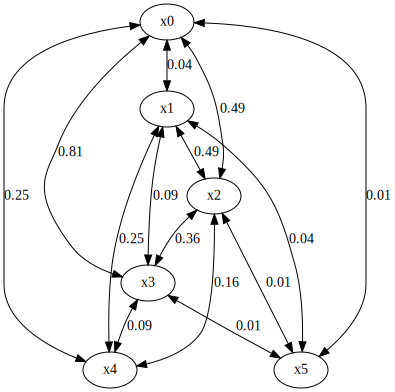

In [13]:
make_dot_for_nan_probability_matrix(cep[1])

Next, we will explain using MultiGroupCAMUV.  
MultiGroupCAMUV does not have a bootstrap method, so we will create a custom class that adds bootstrap to MultiGroupCAMUV.

In [14]:
from sklearn.utils import check_array, resample

class CustomMultiGroupCAMUV(lingam.MultiGroupCAMUV):

    def bootstrap(self, X_list, n_sampling=10):
        X_list = [check_array(X) for X in X_list]
        n_features = X_list[0].shape[1]
        adjacency_matrices = np.zeros([n_sampling, n_features, n_features])
        total_effects = np.zeros_like(adjacency_matrices)
        for i in range(n_sampling):
            print(f"\rBootstrap step {i+1} of {n_sampling}", end="")
            resampled_X_list, resampled_indices = map(list, zip(*[resample(X, np.arange(X.shape[0])) for X in X_list]))
            model.fit(resampled_X_list)
            adjacency_matrices[i] = model.adjacency_matrix_
        bootstrap_results = [
            lingam.BootstrapResult(adjacency_matrices, total_effects, resampled_indices)
        ]
        return bootstrap_results

In [15]:
np.random.seed(0)
X_list = [X1, X2]
model = CustomMultiGroupCAMUV()
results = model.bootstrap(X_list, 10)

Bootstrap step 10 of 10

In [16]:
cep = get_common_edge_probabilities(results, mode="across")
print_common_edge_directions(cep, labels=labels)

x5 <--- x0 (100.0%)
x3 <--> x0 (100.0%)
x4 <--- x0 (90.0%)
x1 <--- x2 (80.0%)
x2 <--- x3 (80.0%)
x1 <--- x0 (70.0%)
x4 <--- x2 (70.0%)
x1 <--- x4 (70.0%)
x5 <--> x1 (40.0%)
x5 <--> x2 (40.0%)
x4 <--- x3 (30.0%)
x2 <--- x0 (20.0%)
x2 <--- x1 (20.0%)
x5 <--- x4 (20.0%)
x1 <--- x5 (20.0%)
x4 <--> x2 (20.0%)
x5 <--> x4 (20.0%)
x1 <--- x3 (10.0%)
x2 <--- x4 (10.0%)
x4 <--- x5 (10.0%)
x1 <--> x0 (10.0%)
x4 <--> x1 (10.0%)
x5 <--> x3 (10.0%)


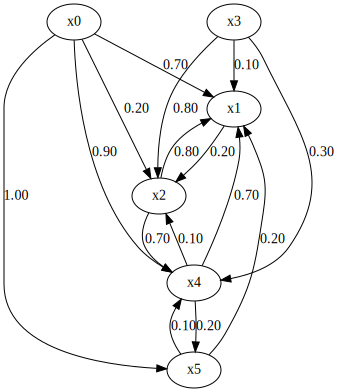

In [17]:
make_dot(cep[0], lower_limit=0.01)

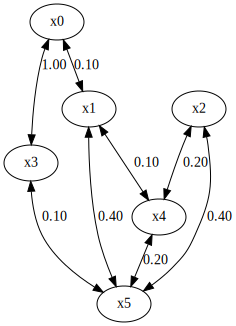

In [18]:
make_dot_for_nan_probability_matrix(cep[1])